### importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


### Data info
             Rm means rooms
             #LSTAT means lower-status population
             #The "PTRATIO" feature can be significant in predicting housing prices because 
            # the quality of education is often considered an important factor for families
            # when choosing a place to live. Suburbs with lower pupil-teacher ratios might be more attractive to families, 
            # which could influence housing demand and prices.
            # MDEV means meadian house price 

In [4]:
df.head()   

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [5]:
df.describe()


,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


### Checking null values

In [6]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

## EDA


Outliers


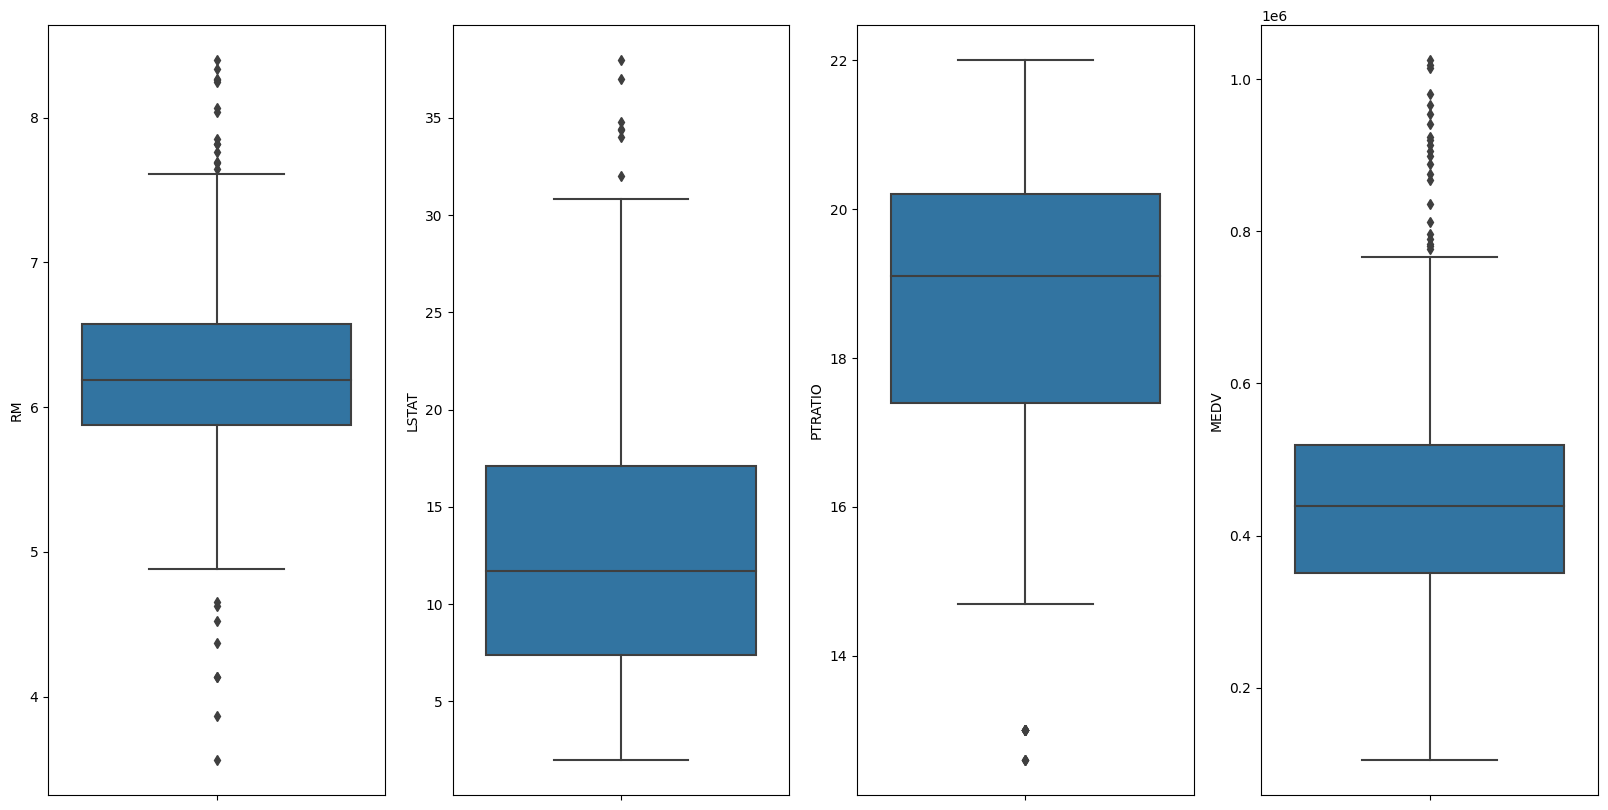

In [7]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1 



# checking skewness of data

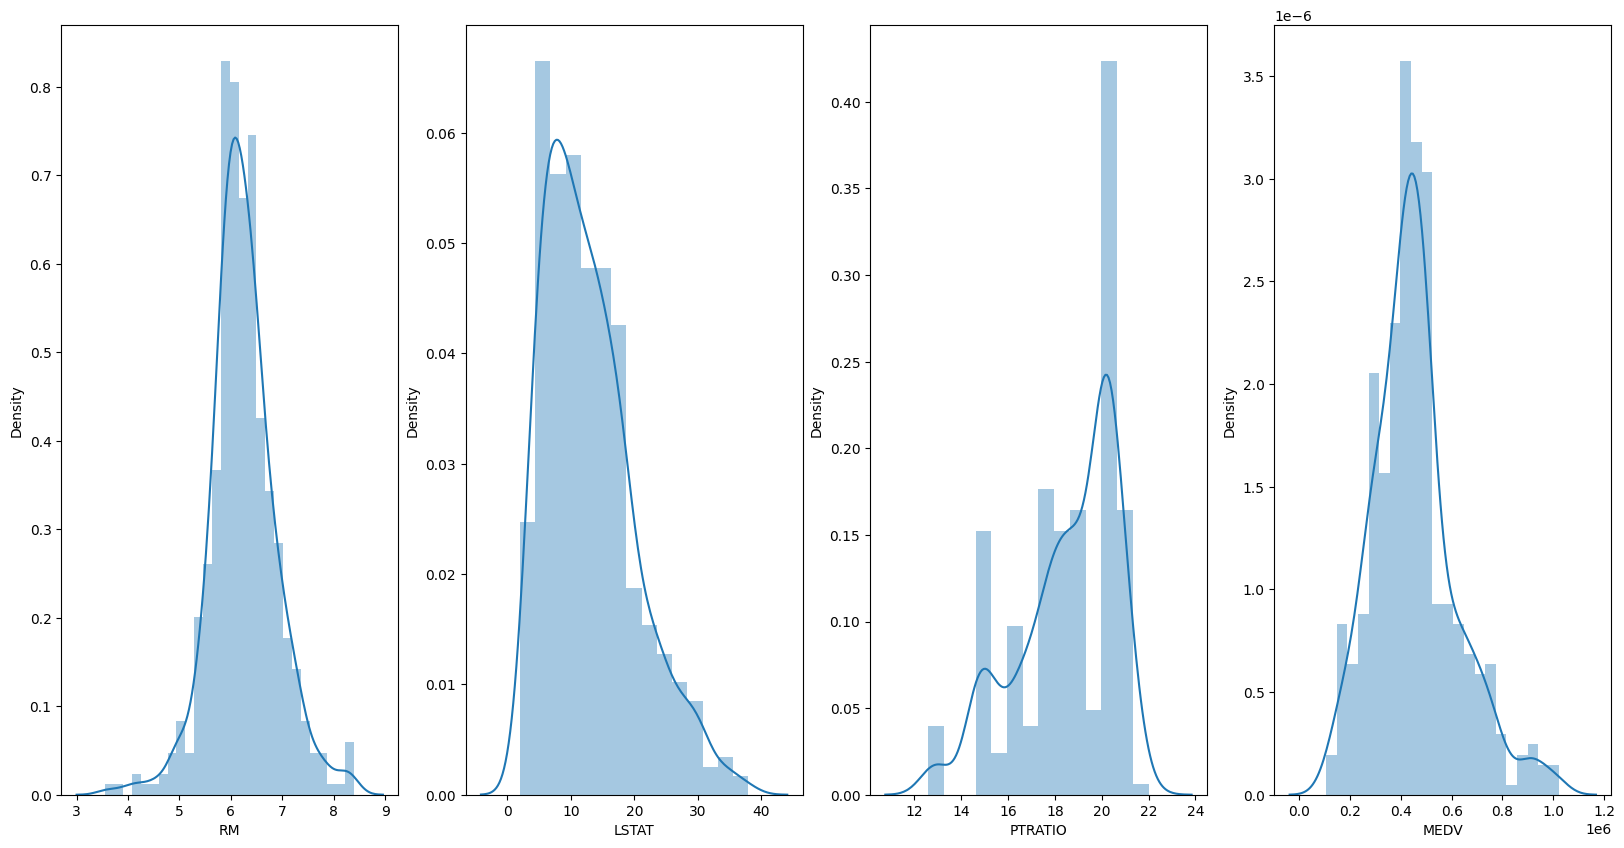

In [8]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1 

## Checking cooleration matrix



<Axes: >

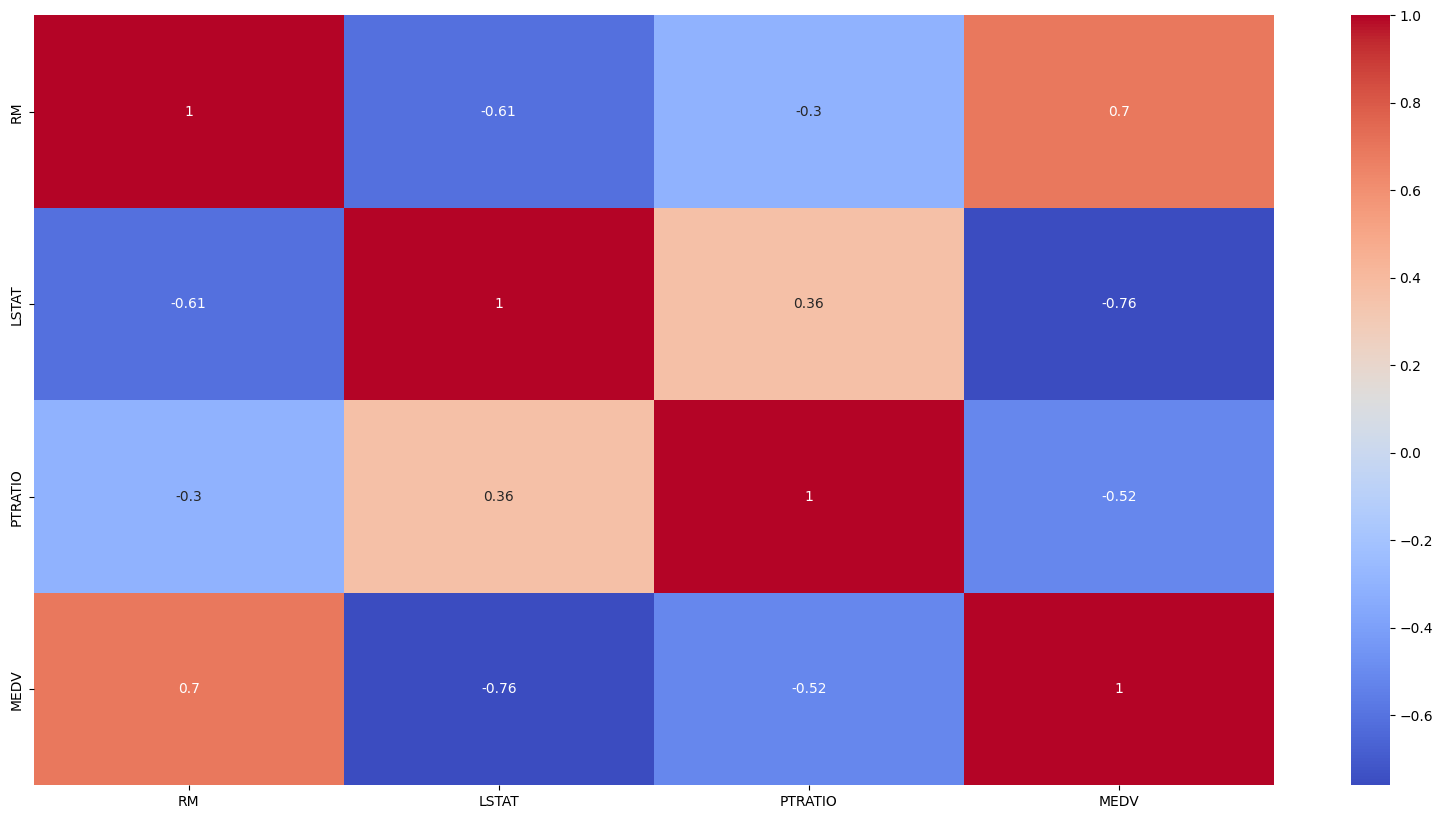

In [9]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

<Axes: xlabel='LSTAT', ylabel='MEDV'>

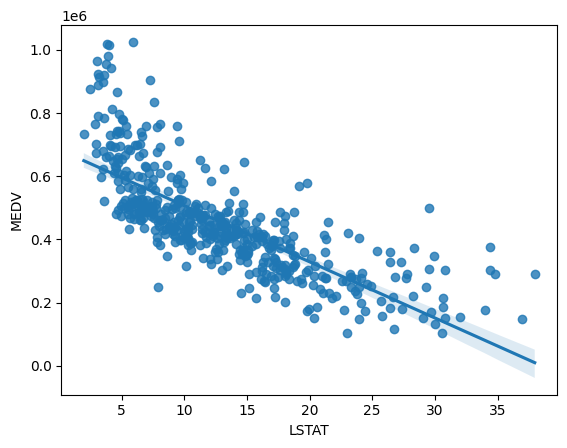

In [10]:
sns.regplot(x=df['LSTAT'],y=df['MEDV']) # here we can se that they both are -vely related 
                                        # as we can se LSAT increases price decreases

<Axes: xlabel='RM', ylabel='MEDV'>

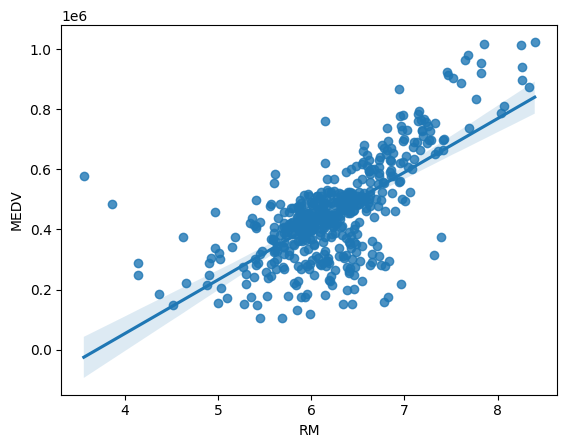

In [11]:
sns.regplot(x=df['RM'],y=df['MEDV'])  #here we get to know that RM increases 
                                      # price also increases 

- As we can see that we have three input columns and one output
- so we have to use multiple regression in these data set

  


## Train test split


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=df.iloc[:,0:3]
y=df.iloc[:,-1]
x

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [15]:
from sklearn.linear_model import LinearRegression 

In [16]:
lr=LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred=lr.predict(x_test)


In [18]:
y_pred=lr.predict(x_test)


In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [20]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MDE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 59915.6657114678
MDE 7069589395.38447
R2 score 0.7282583350680774


In [21]:
lr.coef_

array([ 95161.99685332,  -9795.04368119, -19036.92174371])

In [22]:
lr.intercept_

339212.61065935955

## Conclusion
-here we got the value of coefficent and value of intercept 
-and also got the value of vairence of data 



